In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



# Load the Dataset

In [2]:
# Load the dataset (replace 'your_file.csv' with the actual filename)
file_path = "germany_housing_renter_raw.csv"

df = pd.read_csv(file_path)

In [3]:
# Display basic info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      494 non-null    int64  
 1   City                      494 non-null    object 
 2   Avg_House_Price_€         479 non-null    object 
 3   Avg_Rent_Price_€_per_sqm  457 non-null    float64
 4   New_Houses_Built          479 non-null    float64
 5   Population_Growth_%       462 non-null    float64
 6   Total_Renters_%           427 non-null    object 
 7   Vacancy_Rate_%            407 non-null    float64
 8   Avg_Household_Size        411 non-null    float64
 9   Rental_Demand_Index       425 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 38.7+ KB


In [4]:
df.head()

,Year,City,Avg_House_Price_€,Avg_Rent_Price_€_per_sqm,New_Houses_Built,Population_Growth_%,Total_Renters_%,Vacancy_Rate_%,Avg_Household_Size,Rental_Demand_Index
0,2000,Berlin,555612,NaN,9935.0,-0.82,NaN,NaN,NaN,NaN
1,2000,munich,775581,22.25,NaN,1.81,NaN,NaN,NaN,NaN
2,2000,hamburg,426507,6.33,2979.0,2.23,NaN,NaN,NaN,NaN
3,2000,Cologne,684963,9.29,4952.0,0.59,51.38,8.36,2.56,78.0
4,2000,Frankfurt,747337,24.03,3349.0,0.04,60.3,8.87,2.49,30.0


# Data Cleaning

In [5]:
# Standardize city names by:
# 1. Removing any leading or trailing spaces using .strip() (to avoid inconsistencies like " Berlin" vs. "Berlin").
# 2. Capitalizing each word using .title() (to ensure uniform formatting, e.g., "munich" → "Munich").
df["City"] = df["City"].str.strip().str.title()


In [6]:

sorted(df["City"].unique())



['Augsburg',
 'Berlin',
 'Bremen',
 'Cologne',
 'Dortmund',
 'Dresden',
 'Düsseldorf',
 'Essen',
 'Frankfurt',
 'Freiburg',
 'Hamburg',
 'Hanover',
 'Karlsruhe',
 'Kiel',
 'Leipzig',
 'Mannheim',
 'Munich',
 'Nuremberg',
 'Stuttgart',
 'Wiesbaden']

In [7]:
df.head()

,Year,City,Avg_House_Price_€,Avg_Rent_Price_€_per_sqm,New_Houses_Built,Population_Growth_%,Total_Renters_%,Vacancy_Rate_%,Avg_Household_Size,Rental_Demand_Index
0,2000,Berlin,555612,NaN,9935.0,-0.82,NaN,NaN,NaN,NaN
1,2000,Munich,775581,22.25,NaN,1.81,NaN,NaN,NaN,NaN
2,2000,Hamburg,426507,6.33,2979.0,2.23,NaN,NaN,NaN,NaN
3,2000,Cologne,684963,9.29,4952.0,0.59,51.38,8.36,2.56,78.0
4,2000,Frankfurt,747337,24.03,3349.0,0.04,60.3,8.87,2.49,30.0


In [9]:
# Convert price and percentage columns to numeric (handling errors)
df["Avg_House_Price_€"] = pd.to_numeric(df["Avg_House_Price_€"], errors="coerce")
df["Total_Renters_%"] = pd.to_numeric(df["Total_Renters_%"], errors="coerce")


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      494 non-null    int64  
 1   City                      494 non-null    object 
 2   Avg_House_Price_€         478 non-null    float64
 3   Avg_Rent_Price_€_per_sqm  457 non-null    float64
 4   New_Houses_Built          479 non-null    float64
 5   Population_Growth_%       462 non-null    float64
 6   Total_Renters_%           426 non-null    float64
 7   Vacancy_Rate_%            407 non-null    float64
 8   Avg_Household_Size        411 non-null    float64
 9   Rental_Demand_Index       425 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 38.7+ KB


In [11]:
df.isnull().sum()

Year                         0
City                         0
Avg_House_Price_€           16
Avg_Rent_Price_€_per_sqm    37
New_Houses_Built            15
Population_Growth_%         32
Total_Renters_%             68
Vacancy_Rate_%              87
Avg_Household_Size          83
Rental_Demand_Index         69
dtype: int64

In [12]:
df.fillna(df.median(), inplace=True)

C:\Users\mokab\AppData\Local\Temp\ipykernel_16524\3604797450.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


In [13]:
df.isnull().sum()

Year                        0
City                        0
Avg_House_Price_€           0
Avg_Rent_Price_€_per_sqm    0
New_Houses_Built            0
Population_Growth_%         0
Total_Renters_%             0
Vacancy_Rate_%              0
Avg_Household_Size          0
Rental_Demand_Index         0
dtype: int64

In [14]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

14

In [16]:
df[df.duplicated(subset=["Year", "City"], keep=False)]

,Year,City,Avg_House_Price_€,Avg_Rent_Price_€_per_sqm,New_Houses_Built,Population_Growth_%,Total_Renters_%,Vacancy_Rate_%,Avg_Household_Size,Rental_Demand_Index
105,2005,Stuttgart,735242.0,16.86,14246.0,2.350,41.44,4.55,3.36,55.0
106,2005,Stuttgart,735242.0,16.86,14246.0,2.350,41.44,4.55,3.36,55.0
156,2007,Karlsruhe,651282.0,12.64,3217.0,-0.240,60.51,5.33,2.77,39.0
157,2007,Karlsruhe,651282.0,12.64,3217.0,-0.240,60.51,5.33,2.77,39.0
163,2008,Munich,937334.0,8.97,16208.0,0.630,45.93,7.12,1.95,87.0
164,2008,Munich,937334.0,8.97,16208.0,0.630,45.93,7.12,1.95,87.0
169,2008,Düsseldorf,808746.0,24.29,8856.0,1.025,72.93,9.00,2.59,27.0
170,2008,Düsseldorf,808746.0,24.29,8856.0,1.025,72.93,9.00,2.59,27.0
252,2012,Dresden,815947.0,6.12,9706.0,0.150,63.61,4.67,2.44,87.0
253,2012,Dresden,815947.0,6.12,9706.0,0.150,63.61,4.67,2.44,87.0


In [17]:
df = df.drop_duplicates()

In [18]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

# Step 1: Housing Price Trends 📈

### 🔹 1.1 Average House Price Trend Over the Years

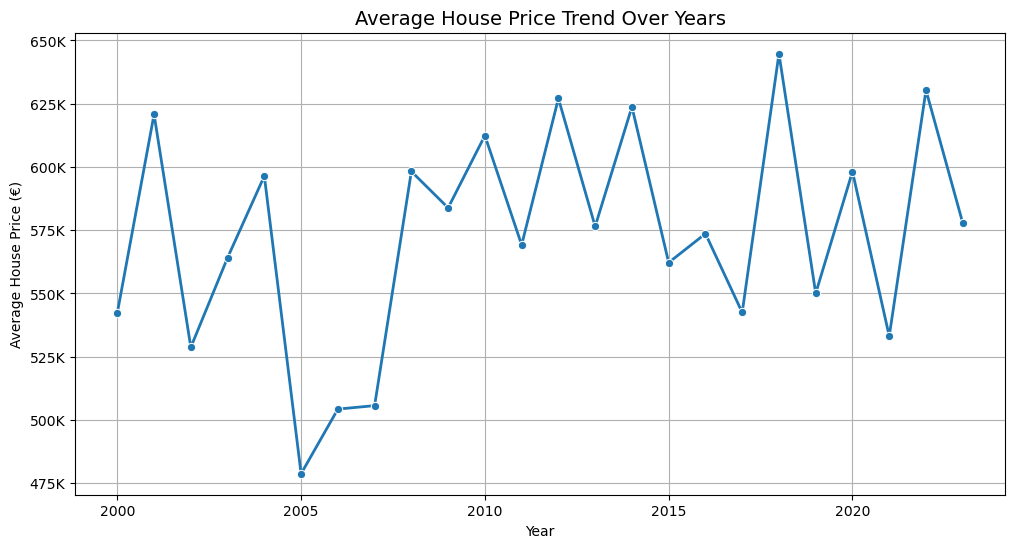

In [19]:
import matplotlib.ticker as mtick

# Group by year and calculate the average house price
price_trend = df.groupby("Year")["Avg_House_Price_€"].mean()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=price_trend.index, y=price_trend.values, marker="o", linewidth=2)

plt.title("Average House Price Trend Over Years", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average House Price (€)")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.grid(True)
plt.show()


### 🔹 1.2 House Prices Across Different Cities

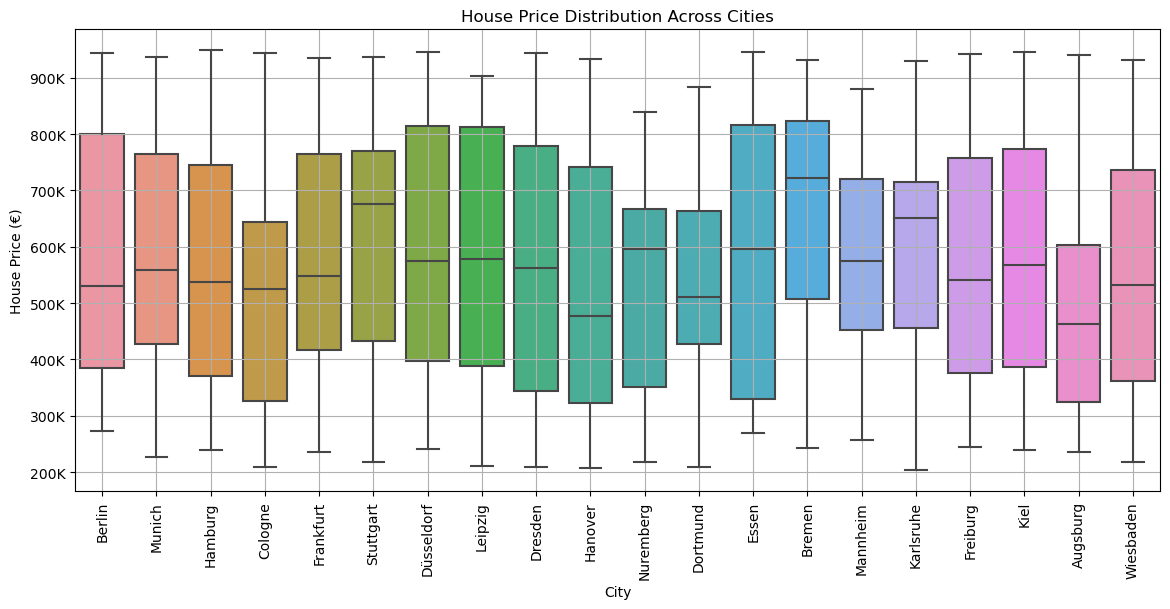

In [20]:
# Visualizing house prices across cities
plt.figure(figsize=(14, 6))
sns.boxplot(x="City", y="Avg_House_Price_€", data=df)

plt.xticks(rotation=90)
plt.title("House Price Distribution Across Cities")
plt.xlabel("City")
plt.ylabel("House Price (€)")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.grid(True)
plt.show()


### 🔹 1.3 Price Trend Over Years For Major Cities

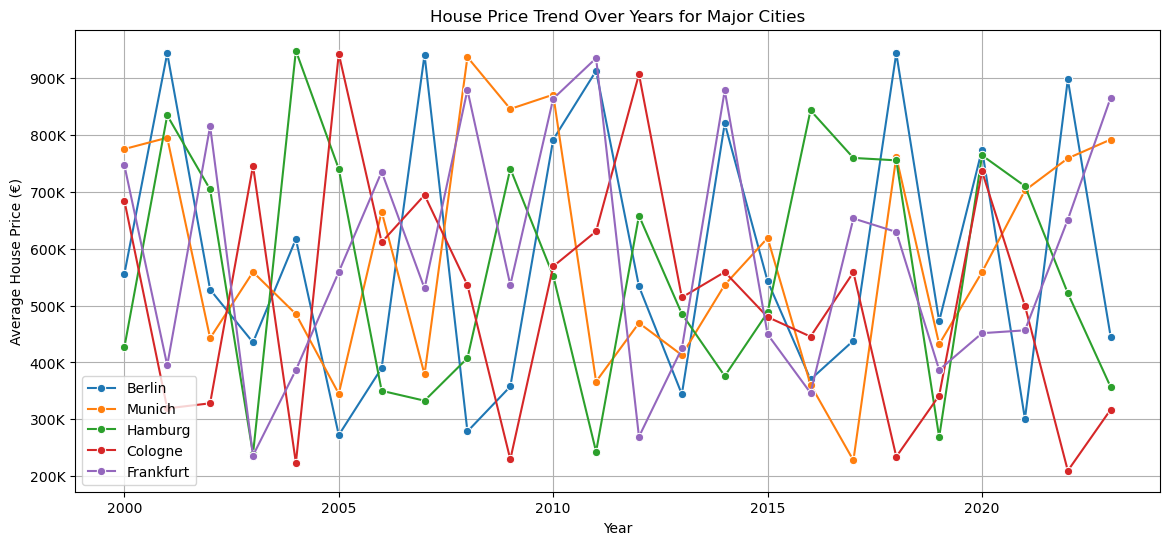

In [21]:


# Create a figure for house price trends
plt.figure(figsize=(14, 6))

# Define major cities to include in the trend analysis
major_cities = ["Berlin", "Munich", "Hamburg", "Cologne", "Frankfurt"]

# Loop through each major city and plot the trend
for city in major_cities:
    city_data = df[df["City"] == city].groupby("Year")["Avg_House_Price_€"].mean()
    sns.lineplot(x=city_data.index, y=city_data.values, marker="o", label=city)

# Title and labels
plt.title("House Price Trend Over Years for Major Cities")
plt.xlabel("Year")
plt.ylabel("Average House Price (€)")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

# Display legend
plt.legend()

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()


# Step 2: Rental Market Analysis 🏢

### 2.1 Rent Prices Over Time

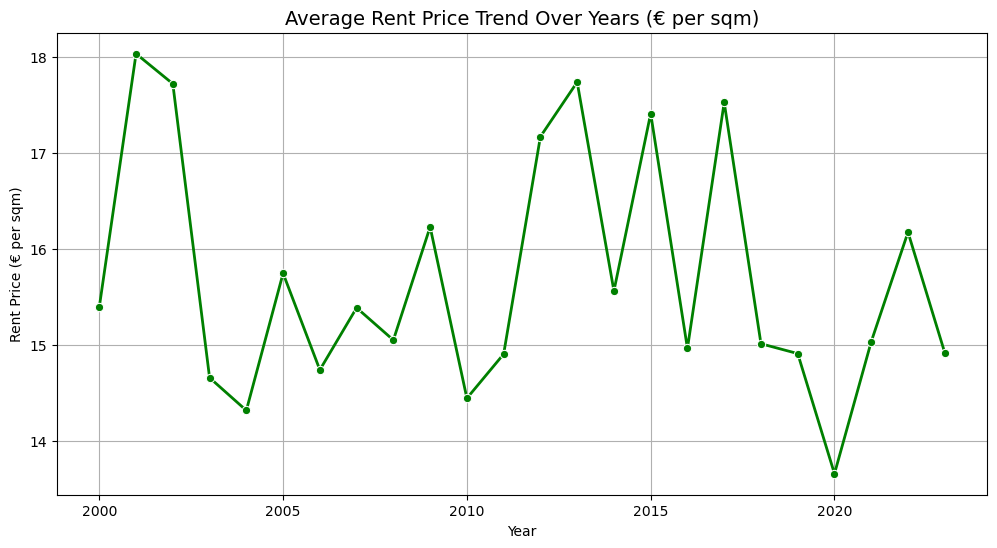

In [22]:
# Group by year and calculate average rent price per square meter
rent_trend = df.groupby("Year")["Avg_Rent_Price_€_per_sqm"].mean()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=rent_trend.index, y=rent_trend.values, marker="o", linewidth=2, color="green")

plt.title("Average Rent Price Trend Over Years (€ per sqm)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Rent Price (€ per sqm)")

plt.grid(True)
plt.show()


### 2.2 Rent Prices Across Cities

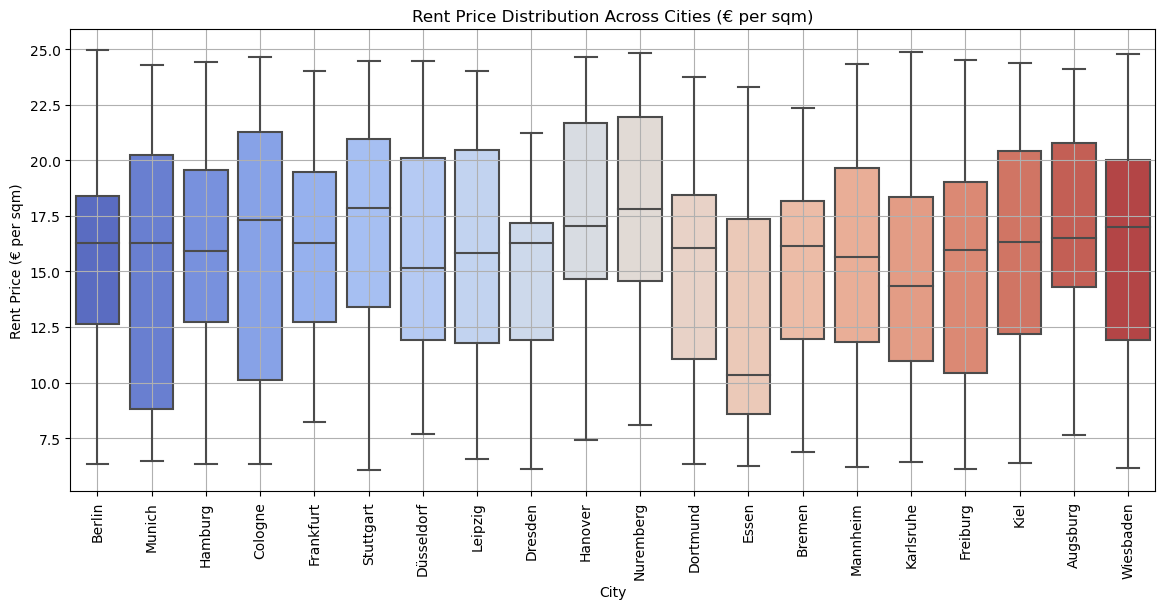

In [23]:
# Visualizing rent prices across cities
plt.figure(figsize=(14, 6))
sns.boxplot(x="City", y="Avg_Rent_Price_€_per_sqm", data=df, palette="coolwarm")

plt.xticks(rotation=90)
plt.title("Rent Price Distribution Across Cities (€ per sqm)")
plt.xlabel("City")
plt.ylabel("Rent Price (€ per sqm)")
plt.grid(True)
plt.show()


# Step 3: Vacancy Rate & Demand Insights 📊

### 🔹 3.1 Vacancy Rates by City

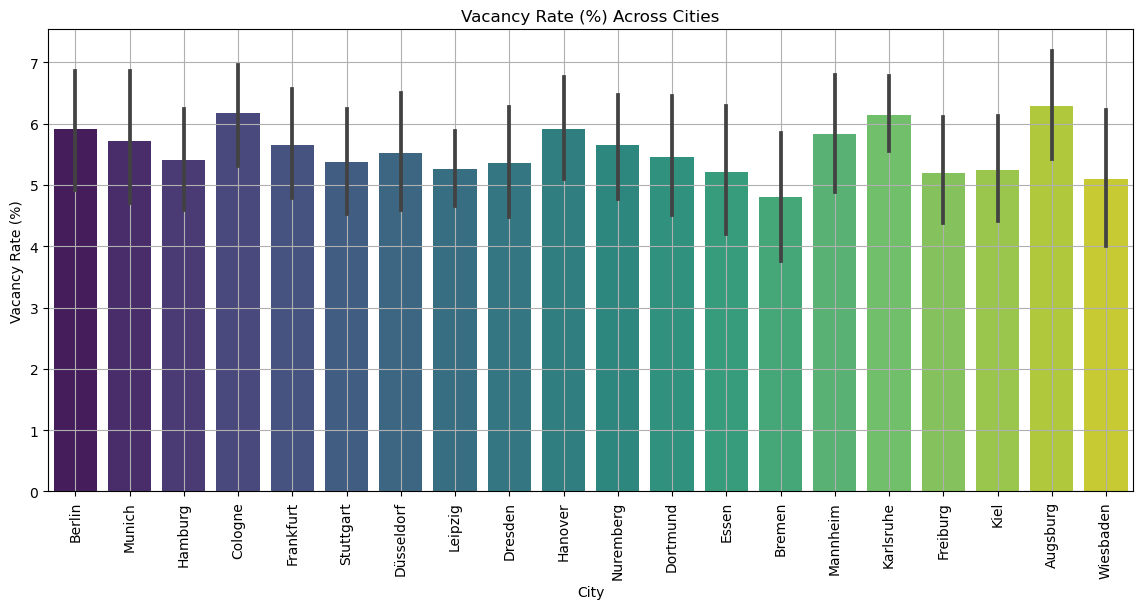

In [24]:
# Visualizing vacancy rates across cities
plt.figure(figsize=(14, 6))
sns.barplot(x="City", y="Vacancy_Rate_%", data=df, palette="viridis")

plt.xticks(rotation=90)
plt.title("Vacancy Rate (%) Across Cities")
plt.xlabel("City")
plt.ylabel("Vacancy Rate (%)")
plt.grid(True)
plt.show()


### 🔹 3.2 Rental Demand Index by City

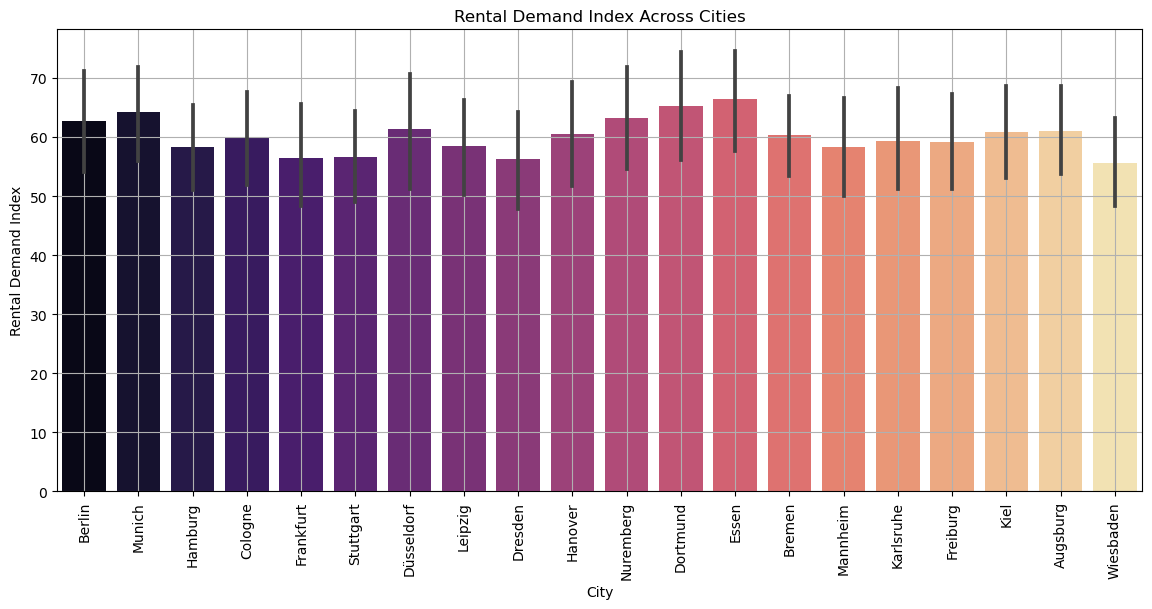

In [25]:
# Visualizing rental demand index across cities
plt.figure(figsize=(14, 6))
sns.barplot(x="City", y="Rental_Demand_Index", data=df, palette="magma")

plt.xticks(rotation=90)
plt.title("Rental Demand Index Across Cities")
plt.xlabel("City")
plt.ylabel("Rental Demand Index")
plt.grid(True)
plt.show()


#                    ---------- ----------------------- ----------------------------------

# Predictive Modeling: House Price Forecasting

C:\Users\mokab\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


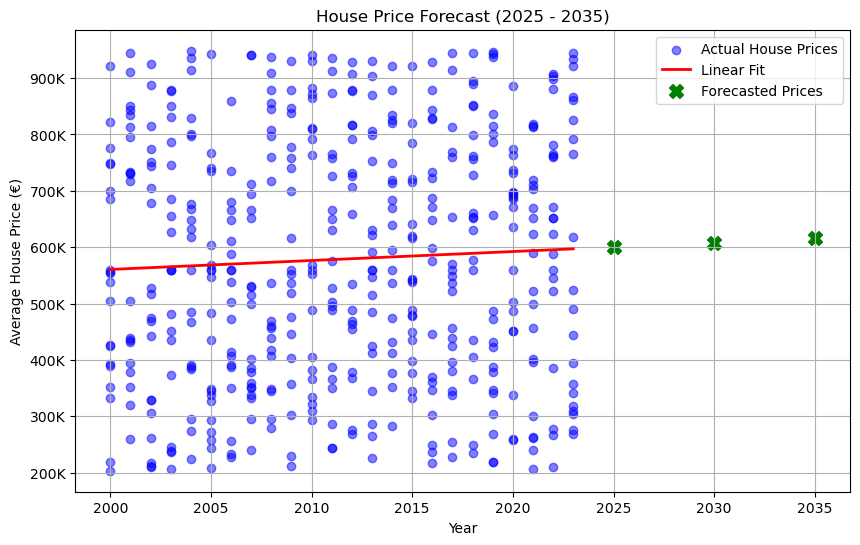

Predicted House Price in 2025: €600,171.37
Predicted House Price in 2030: €608,114.74
Predicted House Price in 2035: €616,058.12


In [26]:
# Prepare data: Using Year to predict house prices
X = df[["Year"]]
y = df["Avg_House_Price_€"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict house prices for the test set and upcoming years
future_years = np.array([[2025], [2030], [2035]])  # Define future years
future_prices = model.predict(future_years)  # Predict house prices

# Plot actual house prices and predictions
plt.figure(figsize=(10, 6))

# Scatter plot for historical data
plt.scatter(X, y, color='blue', label='Actual House Prices', alpha=0.5)

# Plot predictions for existing years
predicted_prices = model.predict(X)
plt.plot(X, predicted_prices, color='red', linewidth=2, label='Linear Fit')

# Scatter plot for forecasted house prices
plt.scatter(future_years, future_prices, color='green', marker='X', s=100, label='Forecasted Prices')

# Formatting the plot
plt.title("House Price Forecast (2025 - 2035)")
plt.xlabel("Year")
plt.ylabel("Average House Price (€)")
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Display the forecasted prices
forecast_results = {year[0]: price for year, price in zip(future_years, future_prices)}

# Print forecasted house prices
for year, price in forecast_results.items():
    print(f"Predicted House Price in {year}: €{price:,.2f}")
